XYZ Company has offices in four different zones. The company wishes to
investigate the following :
● The mean sales generated by each zone.
● Total sales generated by all the zones for each month.
● Check whether all the zones generate the same amount of sales.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_excel(r"C:\Users\HP\OneDrive\Desktop\Sales_data_zone_wise.xlsx")
data.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Month     29 non-null     object
 1   Zone - A  29 non-null     int64 
 2   Zone - B  29 non-null     int64 
 3   Zone - C  29 non-null     int64 
 4   Zone - D  29 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


# The mean sales generated by each zone.

In [18]:
zone_mean=(round(data[['Zone - A', 'Zone - B','Zone - C','Zone - D']].mean()))
print('The mean sales generated by each zone are:', zone_mean)

The mean sales generated by each zone are: Zone - A    1540493.0
Zone - B    1755560.0
Zone - C    1772871.0
Zone - D    1842927.0
dtype: float64


# Total sales generated by all the zones for each month.

In [13]:
data['total_sales']= data.iloc[:, 1:5].sum(axis=1)
data1 = data[['Month', 'total_sales']]
print("Total Sales generated by all the zones for each month is as shown below:")
data1

Total Sales generated by all the zones for each month is as shown below:


,Month,total_sales
0,Month - 1,7022544
1,Month - 2,7152303
2,Month - 3,6475939
3,Month - 4,8174449
4,Month - 5,5995328
5,Month - 6,7151387
6,Month - 7,7287108
7,Month - 8,7816299
8,Month - 9,6703395
9,Month - 10,7128210


<AxesSubplot:>

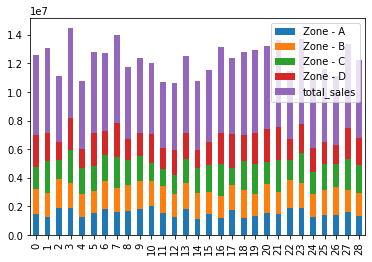

In [7]:
data.plot.bar(stacked=True)

# Check whether all the zones generate the same amount of sales.

In [ ]:
Null Hypothesis: Sales generated by Zone-A=Sales generated by Zone-B=Sales generated by Zone-C=Sales generated by Zone-D
Alternate Hypothesis: Sales generated by Zone-A ≠ Sales generated by Zone-B ≠ Sales generated by Zone-C ≠ Sales generated by Zone-D   

In [2]:
# import libraries
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
from statsmodels.formula.api import ols
from matplotlib import pyplot as plt
import seaborn as sns 

In [5]:
df = pd.melt(data,value_vars=['Zone - A','Zone - B','Zone - C','Zone - D'])                
df.columns = [ 'data', 'value']
model = ols('value~C(data)', data=df).fit()
anova = sm.stats.anova_lm(model, typ=1)
anova 

,df,sum_sq,mean_sq,F,PR(>F)
C(data),3.0,1.483058e+12,4.943525e+11,5.672056,0.001183
Residual,112.0,9.761449e+12,8.715579e+10,NaN,NaN


In [10]:
# arguments: f(numerator degrees of freedom, denominator degrees of freedom)
# arguments: ppf(0.95 level of significance)
scipy.stats.f(3,112).ppf(0.95)

2.6856434512366034

In [ ]:
# Map showing how Means vary among different Zones

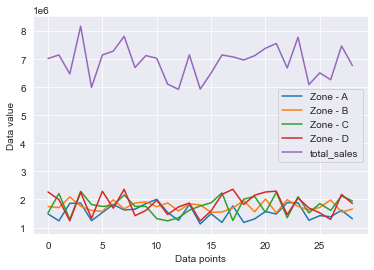

In [30]:
sns.set_style('darkgrid')
data.plot()
plt.xlabel('Data points')
plt.ylabel('Data value')
plt.show() 

In [ ]:
The test statistic is 5.672056, and the p-value is 0.001183. 
Since,Calculated F value(ie.5.672056) is higher than Critical table value (ie.2.6856434512366034) and the p-value is small we have enough 
evidence in the data to reject Null Hypothesis. So, it is concluded that the sales generated by Zone-A,Zone_B,Zone-C & Zone-D are not the same.